In [1]:
#Befor Start Analysis import basic librabry
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
''' Problem statement of case study : 
The problem statement of the Boston Housing dataset is to predict the median value of owner-occupied homes in Boston, 
Massachusetts, based on various socio-economic factors like crime rate, property tax, age of property, and racial composition of the neighborhood, 
essentially attempting to understand how different neigh.borhood characteristics influence housing prices in the city. 
'''

' Problem statement of case study : \nThe problem statement of the Boston Housing dataset is to predict the median value of owner-occupied homes in Boston, \nMassachusetts, based on various socio-economic factors like crime rate, property tax, age of property, and racial composition of the neighborhood, \nessentially attempting to understand how different neighborhood characteristics influence housing prices in the city. \n'

In [3]:
#befor Load dataset to check system path
import os
os.getcwd()

'C:\\Users\\ADESH'

In [4]:
#To load datset 
df=pd.read_csv("BostonHousing.csv")

In [5]:
'''
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 
The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

"\nThe Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. \nThe following describes the dataset columns:\n\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

In [6]:
#To check data 
df.shape

(506, 14)

In [7]:
#To check the data columns
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#To check the data types of columns
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [9]:
#To check the null values in dataset
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

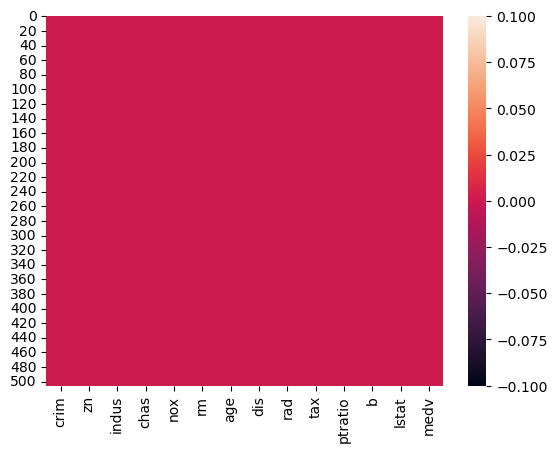

In [10]:
#To check the null values with map usnig seaborn liabrabry 
sb.heatmap(df.isnull())
plt.show()

In [11]:
df.duplicated().sum()

0

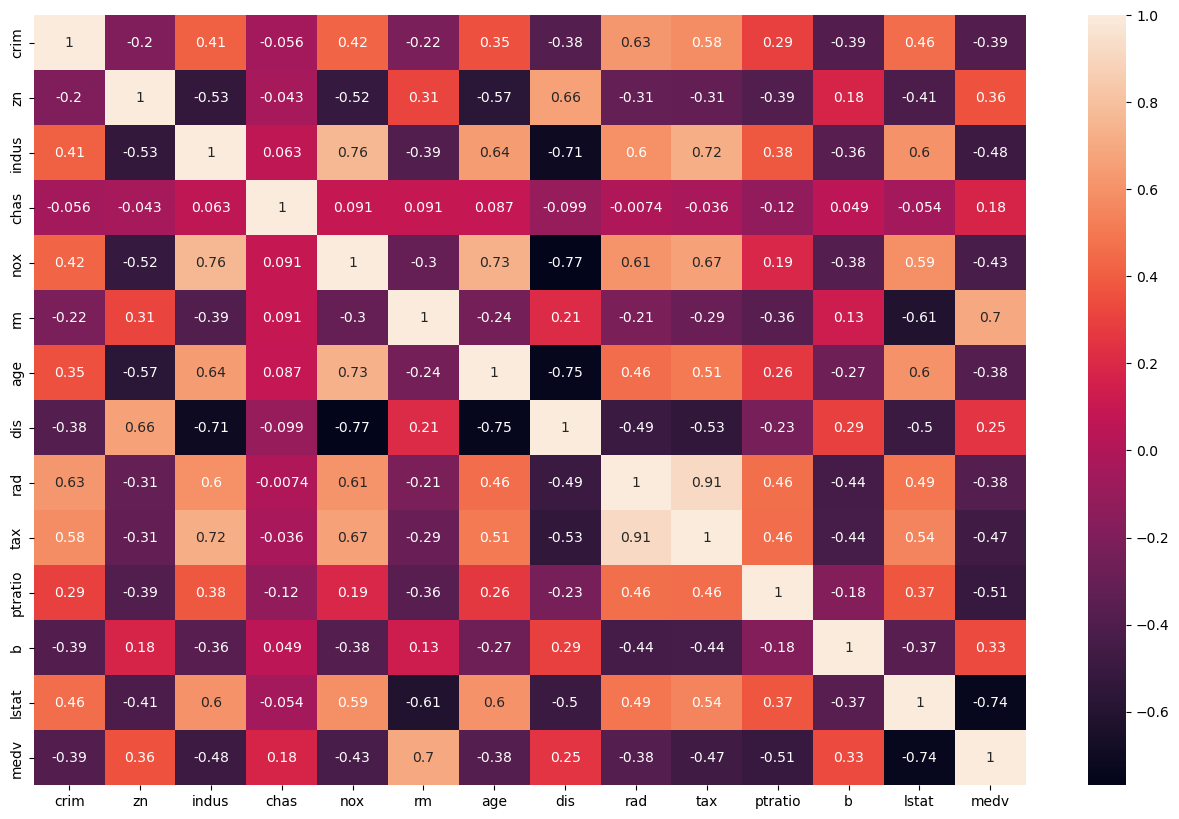

In [12]:
#To check the corelation between input and output
plt.figure(figsize=(16,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
X=df[["rm","ptratio","lstat"]]
Y=df['medv']

In [14]:
X.columns

Index(['rm', 'ptratio', 'lstat'], dtype='object')

In [15]:
X.head()

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [16]:
X.shape,Y.shape

((506, 3), (506,))

In [17]:
X.dtypes

rm         float64
ptratio    float64
lstat      float64
dtype: object

In [18]:
Y.dtypes

dtype('float64')

In [19]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [20]:
X_train.shape,X_test.shape

((354, 3), (152, 3))

In [21]:
Y_train.shape,Y_test.shape

((354,), (152,))

In [22]:
#Aplly standardScaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
#Create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [23]:
X_train

array([[-0.44013266,  1.18880212, -0.64691635],
       [-0.41555492,  0.58247746,  0.20337764],
       [ 0.78152554,  0.81567925,  1.13897622],
       ...,
       [ 0.21912904,  0.81567925,  0.88168661],
       [-0.242065  , -0.49025077, -0.28643573],
       [-0.58326185,  0.34927567, -0.57674646]])

In [24]:
type(X_train),type(X_test),X_train.ndim,X_test.ndim

(numpy.ndarray, numpy.ndarray, 2, 2)

In [25]:
#Perform model with LinearRegression
from sklearn.linear_model import LinearRegression

In [26]:
#Create the object of class LinearRegression
lr=LinearRegression()

In [27]:
#train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
#Checslop of each input
lr.coef_

array([ 2.44052763, -2.0024853 , -4.41039845])

In [29]:
X.columns

Index(['rm', 'ptratio', 'lstat'], dtype='object')

In [30]:
#Hold input and slop in new DataFrame
dict={'input':X.columns,'slope':lr.coef_}
df1=pd.DataFrame(dict)
df1

,input,slope
0,rm,2.440528
1,ptratio,-2.002485
2,lstat,-4.410398


In [31]:
#To check intercept
lr.intercept_

22.33983050847458

In [32]:
#Evaluate the model
#test the model with 30% data
Y_pred=lr.predict(X_test)
Y_pred

array([27.78511639, 28.20483188, 18.52350809, 23.54617906, 19.24312332,
       21.30849142, 27.98252064, 19.27167672, 20.17971449, 26.0445041 ,
       25.62723451, 30.39240782, 20.71130123, 24.54161057, 22.32809773,
       18.93388062, 15.86518777, 37.09811693, 28.87746875, 11.10569904,
       21.33956928, 21.39844573, 25.72817853, 25.98864841, 29.69636771,
       12.51046844, 14.9265866 , 22.64486913, 35.35992586, 12.87323824,
       28.16375613, 16.10950036, 38.24363914, 18.58725055, 25.75191392,
       20.10392105, 18.08560145, 29.89138672,  6.94471554, 18.98981525,
       27.48071139, 24.6754922 , 27.86154706, 13.62499774, 17.38953609,
       16.78606525, 38.00759766, 17.35752976, 27.21801001, 22.00245905,
       24.06003788, 25.49465717, 27.43434836, 27.20440406,  6.5604996 ,
       25.66975684,  8.96917471, 26.16054387, 17.99323527, 35.82418216,
       20.01347473, 27.52582009, 14.69721467, 18.20132289,  9.16589222,
       30.31869229, 37.03982803, 28.35012309, 25.32121918, 25.23

In [33]:
#Check mean squared error
from sklearn.metrics import mean_squared_error
m=mean_squared_error(Y_test,Y_pred)
print("mean_squared_error ",m)

mean_squared_error  25.40090941218403


In [34]:
#find the training score 
lr.score(X_train,Y_train)

0.650740670299456

In [35]:
#Find the testing score
lr.score(X_test,Y_test)

0.7228623473287099

In [36]:
#here Training score>testing score means model is underfit 
#increase the degree of input X means apply polynomial linear regression 
X.columns

Index(['rm', 'ptratio', 'lstat'], dtype='object')

In [37]:
#model is underfit aplly polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#create the object of polynomialFeatures class and passing the degree of input
pf=PolynomialFeatures(4)  #@ means degree of input

In [39]:
X.columns

Index(['rm', 'ptratio', 'lstat'], dtype='object')

In [40]:
X_ploy=pf.fit_transform(X)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ploy,Y,test_size=0.3,random_state=1)

In [42]:
#Create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [43]:
#perform the model with LinearRegression
#Create the object of LinearRegression
lr1=LinearRegression()

In [44]:
#train the model with 70% training data
lr1.fit(X_train,Y_train)

LinearRegression()

In [45]:
train_score=lr1.score(X_train,Y_train)
print("Training Score : ",train_score)

test_score=lr1.score(X_test,Y_test)
print("Testing Score : ",test_score)

Training Score :  0.7684055324881849
Testing Score :  0.7791347690938625
